In [ ]:
! pip install kagglehub

In [104]:
import kagglehub
import numpy as np
import pandas as pd
import missingno as msno
from pathlib import Path
from sklearn.linear_model import LogisticRegression

# data viz
import seaborn as sns
import matplotlib.pyplot as plt

In [7]:
kagglehub.dataset_download("undefinenull/million-song-dataset-spotify-lastfm")

'/kaggle/input/million-song-dataset-spotify-lastfm'

In [30]:
path = Path("/root/.cache/kagglehub/datasets/undefinenull/million-song-dataset-spotify-lastfm/versions/1")

In [31]:
path

PosixPath('/root/.cache/kagglehub/datasets/undefinenull/million-song-dataset-spotify-lastfm/versions/1')

In [32]:
songs_path = path / 'Music Info.csv'
users_path = path / 'User Listening History.csv'

In [33]:
pd.set_option('display.max_columns', None)

In [34]:
data_song = pd.read_csv(songs_path)

data_song.sample(3)

track_id         name              artist  \
14625  TROMMRU128F4250C74  All About U                2Pac   
35446  TRIREYX12903CA3D40       Poppæa  Theatre of Tragedy   
44416  TRDCLVS128EF34045C    Traintime               Cream   

                                     spotify_preview_url  \
14625  https://p.scdn.co/mp3-preview/e9839e9e8a92fd04...   
35446  https://p.scdn.co/mp3-preview/5b5ffdeb5c262ab6...   
44416  https://p.scdn.co/mp3-preview/8a59ca2ce6355d0e...   

                   spotify_id                                        tags  \
14625  0I7PQtYb19YhcQ8lIOxpz5                           rap, 90s, hip_hop   
35446  0PcHxQLbiLHdDFcZIetyCW                    doom_metal, gothic_metal   
44416  28biscKlwmhqG5hnw1Zybh  rock, classic_rock, blues, 60s, blues_rock   

      genre  year  duration_ms  danceability  energy  key  loudness  mode  \
14625   NaN  2005       278800         0.907   0.735    2    -2.036     1   
35446   NaN  2001       316960         0.455   0.901    9    -3.345     1   
44416   NaN  2018       199666         0.376   0.882    7   -11.088     0   

       speechiness  acousticness  instrumentalness  liveness  valence  \
14625       0.1210      0.088700            0.0000    0.2230    0.824   
35446       0.0377      0.000281            0.0273    0.9670    0.221   
44416       0.1300      0.927000            0.6060    0.0976    0.518   

         tempo  time_signature  
14625  103.179               4  
35446  132.158               4  
44416  164.547               4

In [35]:
data_user = pd.read_csv(users_path)

data_user.sample(3)

track_id                                   user_id  \
7531563  TRUDNXE128F92F91C4  73a0afcd14d69dd1acb3c3f786bfaced56156973   
8030059  TRUWRRQ128F149273F  5dbd8e5661f3ce0098cd4818d7c11faedc3e9e17   
3790280  TRPRUME12903CFE793  7d852304f1708914a995e1af4120ffaa04b3ed87   

         playcount  
7531563          1  
8030059          1  
3790280          1

## **Working with Songs Data First.**

### **Initial Analysis**

In [41]:
data_song.shape

(50683, 20)

**There are 21 Features and 50683 Rows in our dataset.**

In [36]:
data_song.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50683 entries, 0 to 50682
Data columns (total 21 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   track_id             50683 non-null  object 
 1   name                 50683 non-null  object 
 2   artist               50683 non-null  object 
 3   spotify_preview_url  50683 non-null  object 
 4   spotify_id           50683 non-null  object 
 5   tags                 49556 non-null  object 
 6   genre                22348 non-null  object 
 7   year                 50683 non-null  int64  
 8   duration_ms          50683 non-null  int64  
 9   danceability         50683 non-null  float64
 10  energy               50683 non-null  float64
 11  key                  50683 non-null  int64  
 12  loudness             50683 non-null  float64
 13  mode                 50683 non-null  int64  
 14  speechiness          50683 non-null  float64
 15  acousticness         50683 non-null 

**Key Observation**:
- We can see that there are some missing values in `genre` and `tags`.
- dtypes of all the features are in right format
- name of all the features are also accurate and correctly represent the data in the column.
- we need to normalize `tempo`, `loudness`.

In [37]:
data_song.describe(include = ['float'])

danceability        energy      loudness   speechiness  acousticness  \
count  50683.000000  50683.000000  50683.000000  50683.000000  50683.000000   
mean       0.493537      0.686486     -8.291204      0.076023      0.213808   
std        0.178838      0.251808      4.548365      0.076007      0.302848   
min        0.000000      0.000000    -60.000000      0.000000      0.000000   
25%        0.364000      0.514000    -10.375000      0.035200      0.001400   
50%        0.497000      0.744000     -7.200000      0.048200      0.039900   
75%        0.621000      0.905000     -5.089000      0.083500      0.340000   
max        0.986000      1.000000      3.642000      0.954000      0.996000   

       instrumentalness      liveness       valence         tempo  
count      50683.000000  50683.000000  50683.000000  50683.000000  
mean           0.225283      0.215425      0.433134    123.507682  
std            0.337049      0.184697      0.258779     29.621125  
min            0.000000      0.000000      0.000000      0.000000  
25%            0.000018      0.098400      0.214000    100.683000  
50%            0.005630      0.138000      0.405000    121.989000  
75%            0.441000      0.289000      0.634000    141.639000  
max            0.999000      0.999000      0.993000    238.895000

In [39]:
# dropping unncesarry features

remove_features = ["spotify_preview_url"]

data_song = data_song.drop(remove_features, axis = 1)

In [45]:
# Missing Values

data_song.isnull().sum().sort_values(ascending = False).head(3)

genre       28335
tags         1127
track_id        0
dtype: int64

**There are 28335 missing values in `genre` and 1127 missing values in `tags` feature.**

In [61]:
# percentage of missing value

(data_song.isnull().sum().sort_values(ascending = False).head(3) / data_song.shape[0]) * 100

genre       55.906320
tags         2.223625
track_id     0.000000
dtype: float64

There are **55% Missing values** in the `genre` and **2% Missing values** in `tags`.

<Axes: >

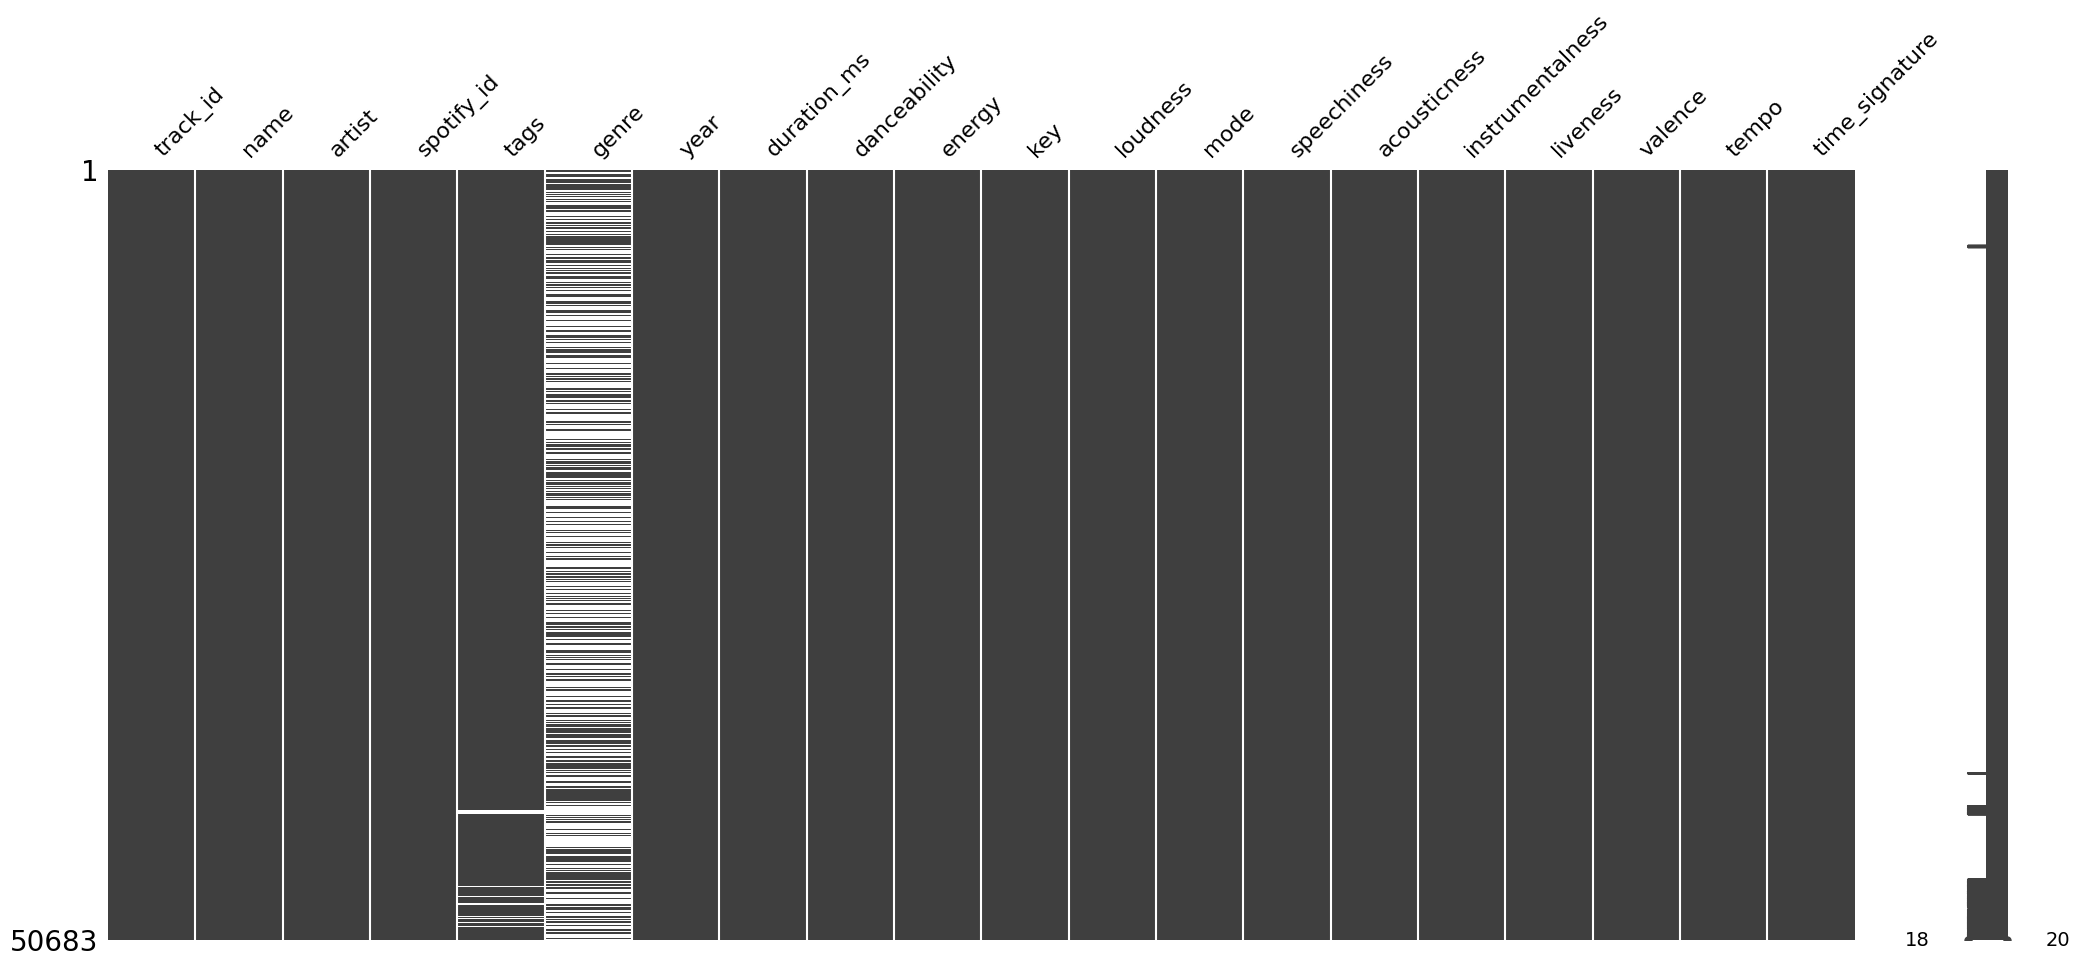

In [64]:
msno.matrix(data_song)

In [68]:
# using Logistic Regression to know feature dependence on `genre` feature

data_song['genre_missing'] = data_song['genre'].isnull().astype(int)

predictors = ['year', 'duration_ms', 'danceability', 'energy', 'loudness', 'tempo']

model = LogisticRegression(max_iter=1000)
model.fit(data_song[predictors], data_song['genre_missing'])

print("Coefficients:", dict(zip(predictors, model.coef_[0])))

Coefficients: {'year': np.float64(0.0003902164578070115), 'duration_ms': np.float64(-1.9258203955726724e-07), 'danceability': np.float64(-0.27690238680697454), 'energy': np.float64(-0.24550680100058328), 'loudness': np.float64(0.0004783389833632592), 'tempo': np.float64(-0.0013762709343113166)}


### **Interpretation**

**Updated Coefficients Analysis**

| Variable       | Coefficient         | Interpretation                                                                 |
|----------------|--------------------|-------------------------------------------------------------------------------|
| year           | 0.00039            | Negligible. No meaningful relationship with genre missingness.          |
| duration_ms    | -1.93e-7 (~0)      | No impact.                                                                    |
| danceability   | -0.277              | Strong effect: Songs with higher danceability are less likely to lack genre.|
| energy         | -0.246              | Strong effect: High-energy songs are significantly less likely to miss genre.|
| loudness       | 0.00048 (~0)       | No meaningful impact.                                                         |
| tempo          | -0.0014 (~0)       | No meaningful impact.                                                         |

---

**Confirmed Conclusions**

- **Missingness is MAR (Missing at Random):**

  - The stronger coefficients for danceability and energy confirm that missing genre values depend on these observed features.
  - This is a clear violation of MCAR (Missing Completely at Random).

- **No evidence for MNAR:**

  - If the missingness were MNAR, we would see no significant correlations with other variables.
  - Here, danceability and energy are clearly influential.

Hence the Missing values in genre feature is MAR Missing at Random.


### **Duplicates**

In [80]:
data_song['name'] = data_song['name'].str.lower()

duplicate_rows = data_song.duplicated(subset='name', keep=False)

duplicate_count = duplicate_rows.sum()

print(f"There are {duplicate_count} duplicate rows")

There are 1614 duplicate rows


In [83]:
duplicates_df = data_song[duplicate_rows]

duplicates_df = duplicates_df.sort_values('name')

In [85]:
duplicates_df.head(4)

track_id  name           artist              spotify_id  \
34480  TRKKZMK128F4257579  3 am     Liv Kristine  1TgsnkiolcBhQssCR37JXx   
6588   TRGGALK12903CB68E5  3 am  Matchbox Twenty  5vYA1mW9g2Coh1HUFUSmlb   
29795  TRLOXMF128F934BF04   3am  Matchbox Twenty  5vYA1mW9g2Coh1HUFUSmlb   
43800  TRPWOAS128E0781045   3am           Halsey  1OfLNb6dQ9dra1B58iT9Ex   

                                                    tags genre  year  \
34480  female_vocalists, power_metal, gothic_metal, g...   NaN  2005   
6588   rock, alternative, pop, alternative_rock, 90s,...   NaN  1996   
29795  rock, alternative, 90s, piano, american, pop_rock   NaN  1996   
43800                                           pop_rock   NaN  2020   

       duration_ms  danceability  energy  key  loudness  mode  speechiness  \
34480       302880         0.516   0.840    0    -6.038     0       0.0390   
6588        225946         0.521   0.673    8    -8.685     1       0.0284   
29795       225946         0.521   0.673    8    -8.685     1       0.0284   
43800       234858         0.385   0.871    0    -4.604     0       0.0795   

       acousticness  instrumentalness  liveness  valence    tempo  \
34480       0.15200           0.00597     0.107    0.441   78.009   
6588        0.00573           0.00000     0.120    0.543  108.031   
29795       0.00573           0.00000     0.120    0.543  108.031   
43800       0.00906           0.00000     0.579    0.538  189.760   

       time_signature  genre_missing  
34480               4              1  
6588                4              1  
29795               4              1  
43800               4              1

Here we can clearly see that there are many songs which have same name but are either sung by differnt singer or has alteast one varying quality hence deleting duplicate rows by name isnt a wise decision. So we will choose multiple features to filter duplicates and then delete

In [90]:
duplicate_rows_count = data_song[data_song.duplicated(subset=["spotify_id","year","duration_ms"],keep=False)].shape[0]

print(F"There are {duplicate_rows_count} Duplicate Rows in the dataset")

There are 18 Duplicate Rows in the dataset


In [91]:
# dropping these duplicate rows

data_song.drop_duplicates(subset=["spotify_id","year","duration_ms"],inplace=True)

### **Column Wise Analysis**

In [92]:
data_song.columns

Index(['track_id', 'name', 'artist', 'spotify_id', 'tags', 'genre', 'year',
       'duration_ms', 'danceability', 'energy', 'key', 'loudness', 'mode',
       'speechiness', 'acousticness', 'instrumentalness', 'liveness',
       'valence', 'tempo', 'time_signature', 'genre_missing'],
      dtype='object')

In [96]:
data_song.dtypes

track_id             object
name                 object
artist               object
spotify_id           object
tags                 object
genre                object
year                  int64
duration_ms           int64
danceability        float64
energy              float64
key                   int64
loudness            float64
mode                  int64
speechiness         float64
acousticness        float64
instrumentalness    float64
liveness            float64
valence             float64
tempo               float64
time_signature        int64
genre_missing         int64
dtype: object

In [99]:
categorical_features = data_song.select_dtypes(include = ['object']).columns

In [101]:
def categorical_analysis(
    df,
    categorical_features,
    k_artists = 7
):
    for feature in categorical_features:
        n_unique = df[feature].str.lower().nunique()
        print(f"Number of categories in column '{feature}': {n_unique}")

        if feature in ["artist", "genre"]:
            print(f"Top {k_artists} categories in '{feature}':")
            print(df[feature].value_counts().head(k_artists))

        if feature == "genre":
            unique_genres = df[feature].dropna().unique()
            print(f"The unique categories in '{feature}' column are: {unique_genres}")

        print("*" * 75)
        print("")

    return None

categorical_analysis(data_song, categorical_features)

Number of categories in column 'track_id': 50674
***************************************************************************

Number of categories in column 'name': 49860
***************************************************************************

Number of categories in column 'artist': 8317
Top 7 categories in 'artist':
artist
The Rolling Stones    132
Radiohead             110
Autechre              105
Tom Waits             100
Bob Dylan              98
The Cure               94
Metallica              85
Name: count, dtype: int64
***************************************************************************

Number of categories in column 'spotify_id': 50674
***************************************************************************

Number of categories in column 'tags': 20054
***************************************************************************

Number of categories in column 'genre': 15
Top 7 categories in 'genre':
genre
Rock          9965
Electronic    3710
Metal         2516

**Observations:**

- The Track ID and Spotify ID's are unique for every row.
- The song names have some repititions. That is because there are a few songs in the data whose name is the same but is sung by a different artist.
- The dataset contains songs of about 8317 artists.
- There are 15 distinct categories in the Genre column.

<ipython-input-108-a572488b0e05>:4: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=90)


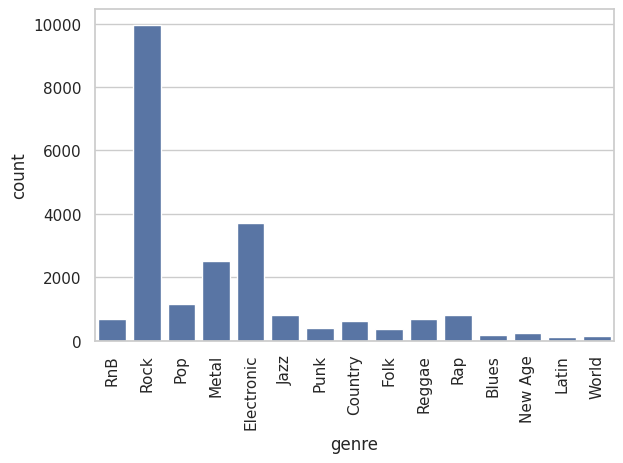

In [108]:
sns.set(style="whitegrid")

ax = sns.countplot(data=data_song, x="genre")
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
plt.tight_layout()
plt.show()

We can clearly see that the most of the values in genre are of **Rock** type followed by **Electronic** and **Metal**.

In [112]:
data_song['tags']

0        rock, alternative, indie, alternative_rock, in...
1        rock, alternative, indie, pop, alternative_roc...
2         rock, alternative, alternative_rock, 90s, grunge
3        rock, alternative, indie, alternative_rock, in...
4        rock, alternative, indie, alternative_rock, in...
                               ...                        
50678                                                  NaN
50679              rock, alternative_rock, japanese, cover
50680                      metal, metalcore, post_hardcore
50681                                                  NaN
50682                                       rock, japanese
Name: tags, Length: 50674, dtype: object

In [115]:
# filtering unique tags
arr = []

for tag in data_song['tags'].dropna().str.replace(" ", '').str.split(","):
  arr.extend(tag)

In [117]:
len(arr)

185274

In [121]:
arr = set(arr)

In [122]:
len(arr)

100

In [126]:
# Replace NaN with empty string to avoid float issues
data_song['tags'] = data_song['tags'].fillna('')

count_tags = {}
for i in arr:
    for row in data_song['tags']:
        if isinstance(row, str) and i in row:
            count_tags[i] = count_tags.get(i, 0) + 1

In [133]:
top_10_tags = dict(sorted(count_tags.items(), key=lambda item: item[1], reverse=True)[:10])

In [134]:
top_10_tags

{'rock': 17608,
 'metal': 9617,
 'pop': 8609,
 'indie': 8190,
 'alternative': 7578,
 'electro': 6831,
 'electronic': 6592,
 'male_vocalists': 5844,
 'female_vocalists': 4515,
 'alternative_rock': 4134}

In [135]:
tags = list(top_10_tags.keys())
frequencies = list(top_10_tags.values())

In [ ]:
df_top_tags = pd.DataFrame({
    'Tag': tags,
    'Frequency': frequencies
})

In [136]:
df_top_tags

Tag  Frequency
0              rock      17608
1             metal       9617
2               pop       8609
3             indie       8190
4       alternative       7578
5           electro       6831
6        electronic       6592
7    male_vocalists       5844
8  female_vocalists       4515
9  alternative_rock       4134

<ipython-input-140-ea088838cef2>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Tag', y='Frequency', data=df_top_tags, palette='viridis')


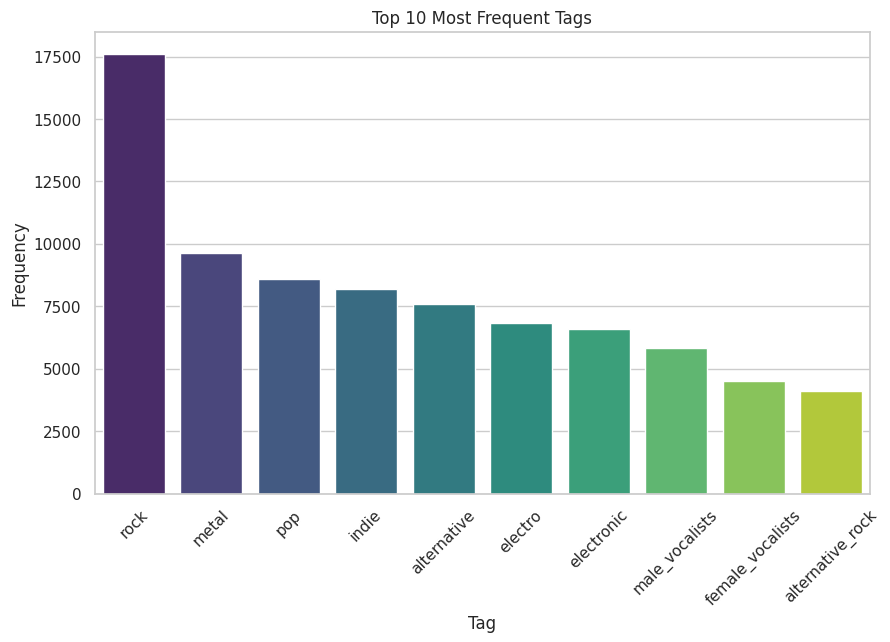

In [140]:
plt.figure(figsize=(10,6))
sns.barplot(x='Tag', y='Frequency', data=df_top_tags, palette='viridis')
plt.title('Top 10 Most Frequent Tags')
plt.xticks(rotation=45)
plt.show()

We can see that most used `tag` is **rock** followed by **metal** and **pop**.

## Integer Based Columns

### Key

**What it means:**  
The musical key in which the song is composed, represented as integers (e.g., 0 = C, 1 = C#, 2 = D, etc., up to 11).

- **When value is small:**  
  Represents keys like C or D, often associated with simplicity or familiarity.  
- **When value is large:**  
  Represents keys like A# or B, which may sound brighter or more complex, depending on the context.

---

### Mode

**What it means:**  
Refers to the modality of the song, where 0 = minor (often associated with sadness or tension) and 1 = major (associated with happiness or resolution).

- **When value is small:**  
  Indicates the song is in a minor mode, creating a more somber or serious tone.  
- **When value is large:**  
  Indicates the song is in a major mode, giving it a cheerful and uplifting feel.

---

### Time Signature

**What it means:**  
The number of beats in each bar of music, typically expressed as an integer (e.g., 4 for 4/4 time).

- **When value is small:**  
  Indicates fewer beats per measure (e.g., 3), which can create a waltz-like or less conventional rhythm.  
- **When value is large:**  
  Indicates more beats per measure (e.g., 5 or 7), often leading to a more complex or experimental rhythmic structure.

A value of **4** in the time signature typically means the song is in **4/4 time**, also known as "common time." This means there are 4 beats per measure, and the quarter note gets one beat.

#### Impact of a 4 Time Signature:

- **Musical Feel:**  
  It creates a steady, balanced, and natural rhythm that is easy to follow.  
- **Prevalence:**  
  It is the most common time signature in Western music, used in many genres like pop, rock, classical, and jazz.  
- **Examples:**  
  Songs like *"Billie Jean"* by Michael Jackson or *"Shape of You"* by Ed Sheeran are in 4/4.


In [150]:
data_song.drop("genre_missing", axis = 1, inplace = True)

In [151]:
integer_features = data_song.select_dtypes("int").columns

print(f"There are {len(integer_features)} features with integer values")

There are 5 features with integer values


In [153]:
df_int = data_song[integer_features]

In [162]:
df_int.describe().drop("time_signature", axis = 1).loc[['max', 'min', 'count']]

year  duration_ms      key     mode
max     2022.0    3816373.0     11.0      1.0
min     1900.0       1439.0      0.0      0.0
count  50674.0      50674.0  50674.0  50674.0

In [164]:
data_song.head()

track_id             name           artist  \
0  TRIOREW128F424EAF0   mr. brightside      The Killers   
1  TRRIVDJ128F429B0E8       wonderwall            Oasis   
2  TROUVHL128F426C441  come as you are          Nirvana   
3  TRUEIND128F93038C4      take me out  Franz Ferdinand   
4  TRLNZBD128F935E4D8            creep        Radiohead   

               spotify_id                                               tags  \
0  09ZQ5TmUG8TSL56n0knqrj  rock, alternative, indie, alternative_rock, in...   
1  06UfBBDISthj1ZJAtX4xjj  rock, alternative, indie, pop, alternative_roc...   
2  0keNu0t0tqsWtExGM3nT1D   rock, alternative, alternative_rock, 90s, grunge   
3  0ancVQ9wEcHVd0RrGICTE4  rock, alternative, indie, alternative_rock, in...   
4  01QoK9DA7VTeTSE3MNzp4I  rock, alternative, indie, alternative_rock, in...   

  genre  year  duration_ms  danceability  energy  key  loudness  mode  \
0   NaN  2004       222200         0.355   0.918    1    -4.360     1   
1   NaN  2006       258613         0.409   0.892    2    -4.373     1   
2   RnB  1991       218920         0.508   0.826    4    -5.783     0   
3   NaN  2004       237026         0.279   0.664    9    -8.851     1   
4   RnB  2008       238640         0.515   0.430    7    -9.935     1   

   speechiness  acousticness  instrumentalness  liveness  valence    tempo  \
0       0.0746      0.001190          0.000000    0.0971    0.240  148.114   
1       0.0336      0.000807          0.000000    0.2070    0.651  174.426   
2       0.0400      0.000175          0.000459    0.0878    0.543  120.012   
3       0.0371      0.000389          0.000655    0.1330    0.490  104.560   
4       0.0369      0.010200          0.000141    0.1290    0.104   91.841   

   time_signature  
0               4  
1               4  
2               4  
3               4  
4               4

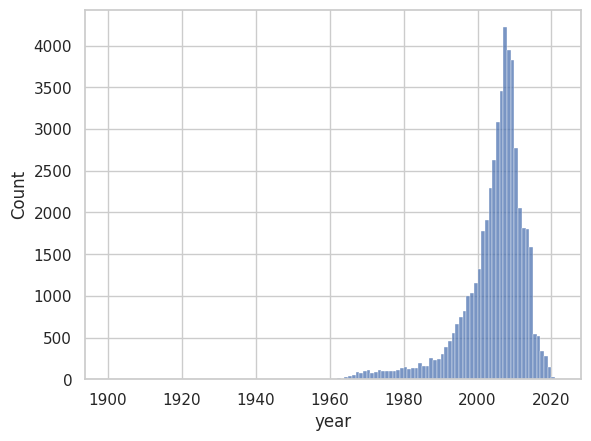

In [168]:
sns.histplot(data = data_song, x = "year", bins = data_song["year"].max() - data_song["year"].min(), stat = "count")
plt.show()

In [172]:
data_song['year'].value_counts().head(5)

year
2007    4221
2008    3947
2009    3827
2006    3453
2005    3085
Name: count, dtype: int64

Most songs are from 2007 - 2008 era

In [175]:
# unique value in key column
data_song['key'].nunique()

12

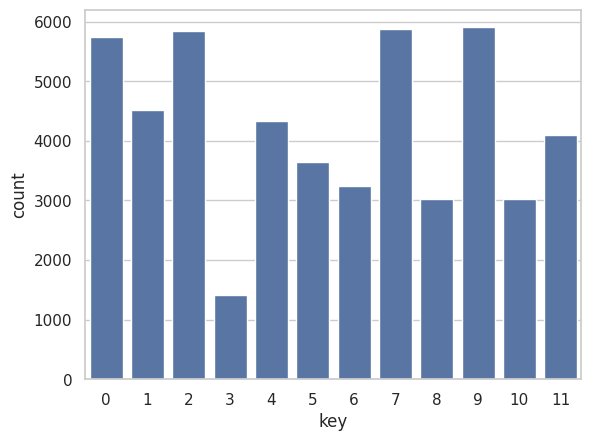

In [176]:
sns.countplot(data = data_song, x = "key")
plt.show()

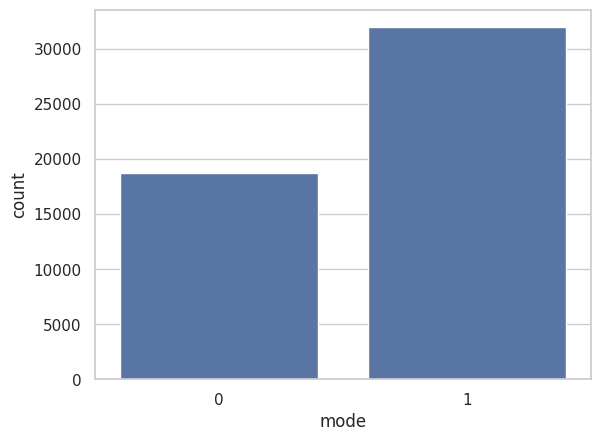

In [179]:
sns.countplot(data = data_song, x = 'mode')
plt.show()

In [184]:
unique_time_signature = data_song['time_signature'].nunique()
print(f"There are {unique_time_signature} unique time signatures in the dataset.")

data_song['time_signature'].unique()

There are 5 unique time signatures in the dataset.


array([4, 3, 5, 1, 0])

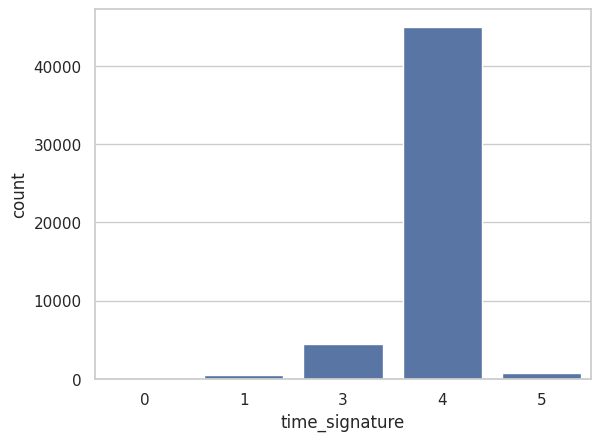

In [187]:
sns.countplot(data = data_song, x = "time_signature")
plt.show()

In [190]:
df_time_signature = data_song['time_signature'].value_counts(normalize=True) * 100
df_time_signature

time_signature
4    88.765442
3     8.880294
5     1.444528
1     0.890003
0     0.019734
Name: proportion, dtype: float64

In [199]:
data_song['duration_min'] = ( data_song['duration_ms'] / (1000  * 60 ))

In [200]:
data_song['duration_min'].describe()

count    50674.000000
mean         4.185893
std          1.793154
min          0.023983
25%          3.212217
50%          3.915550
75%          4.803046
max         63.606217
Name: duration_min, dtype: float64

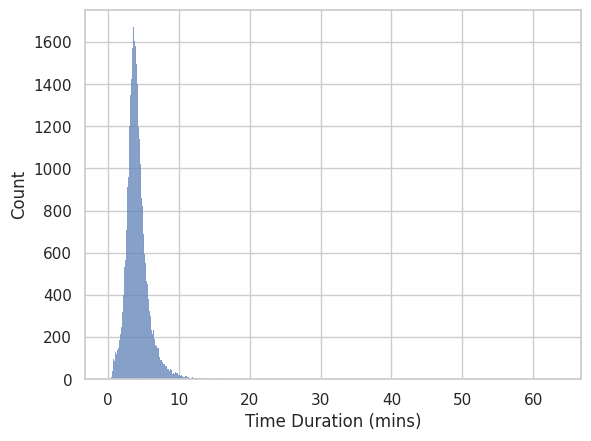

In [201]:
sns.histplot(data_song['duration_min'])
plt.xlabel("Time Duration (mins)")
plt.show()

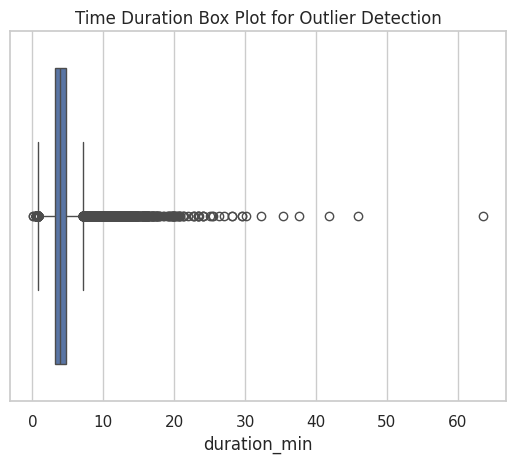

In [203]:
sns.boxplot(data = data_song, x = "duration_min")
plt.title("Time Duration Box Plot for Outlier Detection")
plt.show()

In [206]:
data_song[data_song['duration_min'] > 60]

track_id        name artist              spotify_id  \
25337  TRDAOJL128F932C383  dopesmoker  Sleep  1vhvheW4R0KbK6Kr3NFplW   

                          tags genre  year  duration_ms  danceability  energy  \
25337  psychedelic, doom_metal   NaN  2003      3816373          0.16   0.572   

       key  loudness  mode  speechiness  acousticness  instrumentalness  \
25337    5    -6.949     1       0.0321       0.00367             0.745   

       liveness  valence   tempo  time_signature  duration_min  
25337    0.0952   0.0932  96.926               4     63.606217

### **Float Features EDA**

In [207]:
float_columns = data_song.select_dtypes(include="float").columns

In [210]:
print(f"There are {len(float_columns)} featurs with float dtype")
float_columns

There are 10 featurs with float dtype


Index(['danceability', 'energy', 'loudness', 'speechiness', 'acousticness',
       'instrumentalness', 'liveness', 'valence', 'tempo', 'duration_min'],
      dtype='object')

### **Music Track Features Interprtation**

- **Danceability**
  - **What it means:** Measures how suitable a track is for dancing, based on tempo, rhythm stability, beat strength, and overall regularity.
  - **When value is small:** The song may feel less rhythmic or harder to dance to, like ballads or experimental music.  
  - **When value is large:** The song is highly danceable, with a strong beat and rhythmic consistency, ideal for clubs or parties.

- Energy
  - **What it means:** Represents the intensity and activity of a song, considering factors like loudness, tempo, and instrumentation.
  - **When value is small:** The song feels mellow, calm, or laid-back, such as acoustic or chill tracks.  
  - **When value is large:** The song feels loud, energetic, and lively, often found in rock or EDM genres.

- Loudness
  - **What it means:** The overall volume of the song in decibels (dB), averaged over the track.

  - **When value is small:** The song is quieter, suitable for soft or ambient styles.  
  - **When value is large:** The song is louder and more powerful, typically associated with dynamic or energetic tracks.

- Speechiness
  - **What it means:** Measures the presence of spoken words in a track. A higher value indicates more speech-like content.

  - **When value is small:** The song is more musical, with fewer spoken or rap-like elements.  
  - **When value is large:** The track has spoken word, podcast-style content, or heavy rap influence.

-  Acousticness
  - **What it means:** Reflects how acoustic (non-electronic) the track is.

  - **When value is small:** The track is more electronic or synthetic in nature.  
  - **When value is large:** The track is acoustic, featuring instruments like guitar, piano, or strings.

- Instrumentalness
  - **What it means:** Predicts the likelihood of a song having no vocals (purely instrumental).

  - **When value is small:** The track likely has vocals or lyrics.  
  - **When value is large:** The track is primarily instrumental, like classical or ambient music.

-  Liveness
  - **What it means:** Measures the presence of a live audience in the recording.
  - **When value is small:** The track sounds studio-produced without live ambiance.  
  - **When value is large:** The track feels live, with audience sounds or a concert vibe.

-  Valence
  - **What it means:** Indicates the positivity or happiness of a track's mood.

  - **When value is small:** The song feels sad, somber, or emotionally heavy.  
  - **When value is large:** The song feels cheerful, uplifting, or happy.

-  Tempo
  - **What it means:** The speed of the song in beats per minute (BPM).
  - **When value is small:** The song is slow-paced, such as ballads or downtempo tracks.  
  - **When value is large:** The song is fast-paced, like dance or upbeat genres.


Numerical Analysis for column: danceability
Statistical Summary
count    50674.000000
mean         0.493522
std          0.178833
min          0.000000
25%          0.364000
50%          0.497000
75%          0.621000
max          0.986000
Name: danceability, dtype: float64


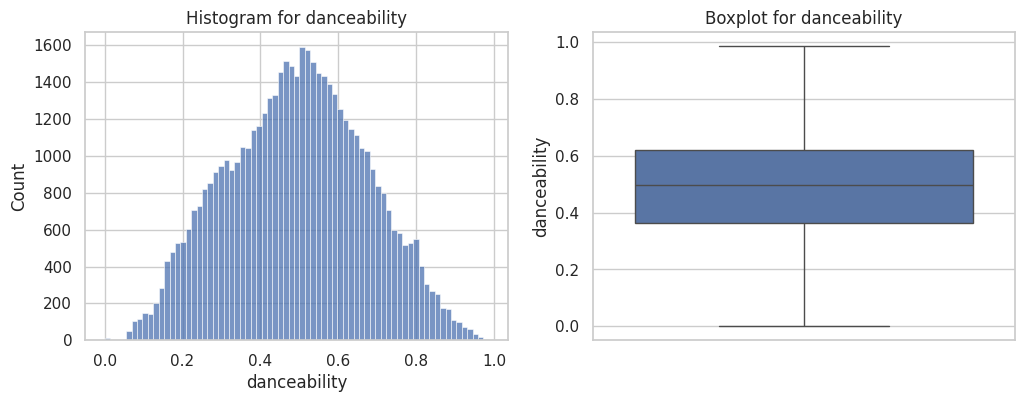

########################################################################################################################
Numerical Analysis for column: energy
Statistical Summary
count    50674.000000
mean         0.686507
std          0.251803
min          0.000000
25%          0.514000
50%          0.744000
75%          0.905000
max          1.000000
Name: energy, dtype: float64


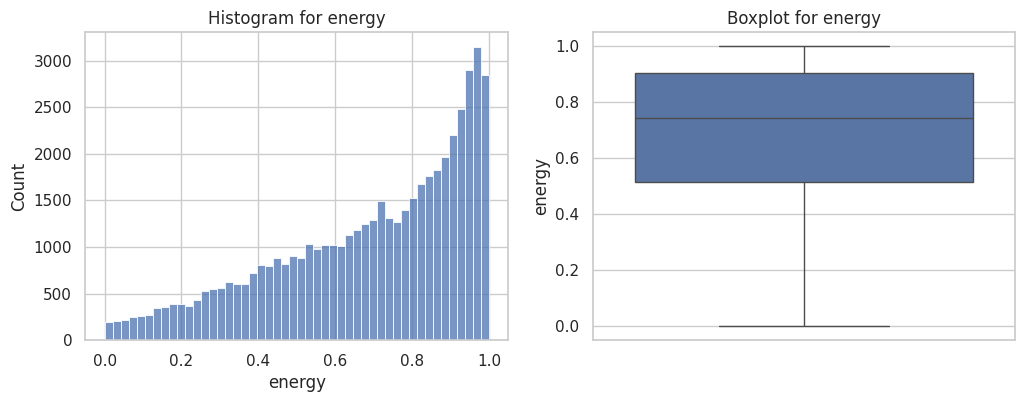

########################################################################################################################
Numerical Analysis for column: loudness
Statistical Summary
count    50674.000000
mean        -8.291007
std          4.548359
min        -60.000000
25%        -10.375000
50%         -7.199500
75%         -5.089000
max          3.642000
Name: loudness, dtype: float64


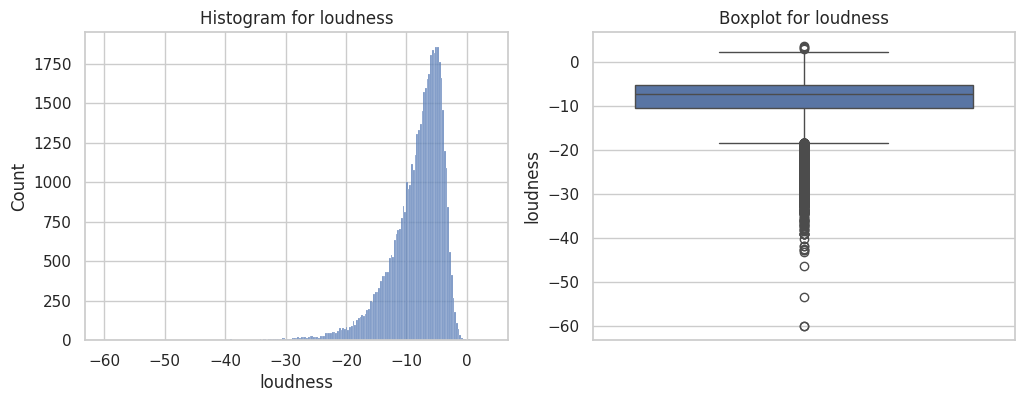

########################################################################################################################
Numerical Analysis for column: speechiness
Statistical Summary
count    50674.000000
mean         0.076026
std          0.076012
min          0.000000
25%          0.035200
50%          0.048200
75%          0.083500
max          0.954000
Name: speechiness, dtype: float64


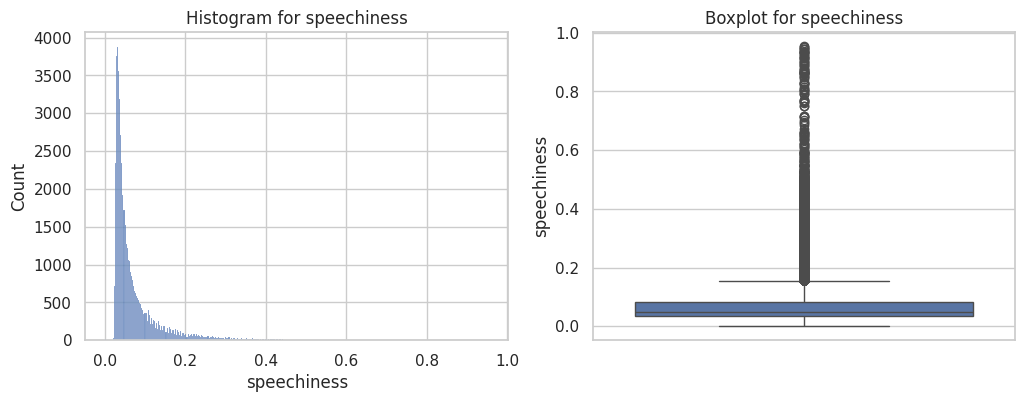

########################################################################################################################
Numerical Analysis for column: acousticness
Statistical Summary
count    50674.000000
mean         0.213798
std          0.302839
min          0.000000
25%          0.001400
50%          0.039900
75%          0.340000
max          0.996000
Name: acousticness, dtype: float64


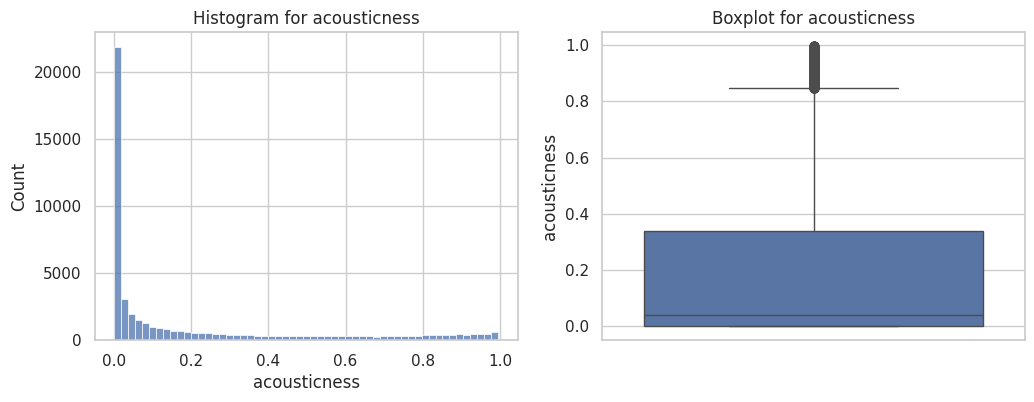

########################################################################################################################
Numerical Analysis for column: instrumentalness
Statistical Summary
count    50674.000000
mean         0.225299
std          0.337067
min          0.000000
25%          0.000018
50%          0.005630
75%          0.441000
max          0.999000
Name: instrumentalness, dtype: float64


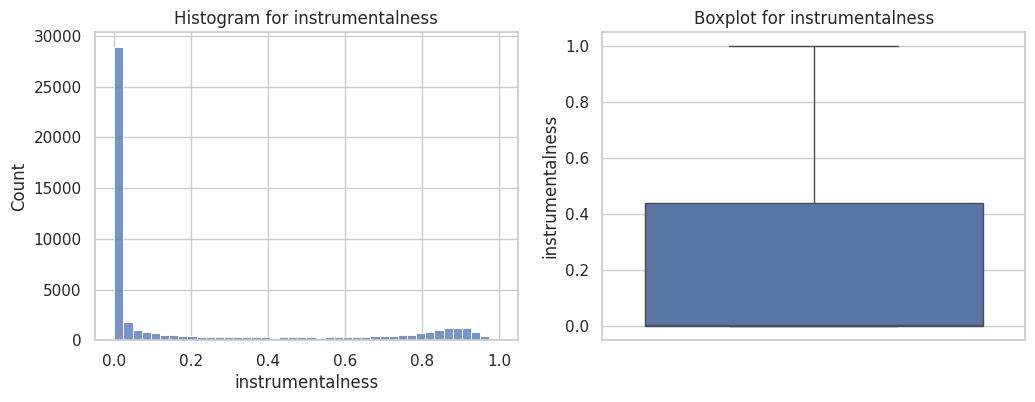

########################################################################################################################
Numerical Analysis for column: liveness
Statistical Summary
count    50674.000000
mean         0.215439
std          0.184708
min          0.000000
25%          0.098400
50%          0.138000
75%          0.289000
max          0.999000
Name: liveness, dtype: float64


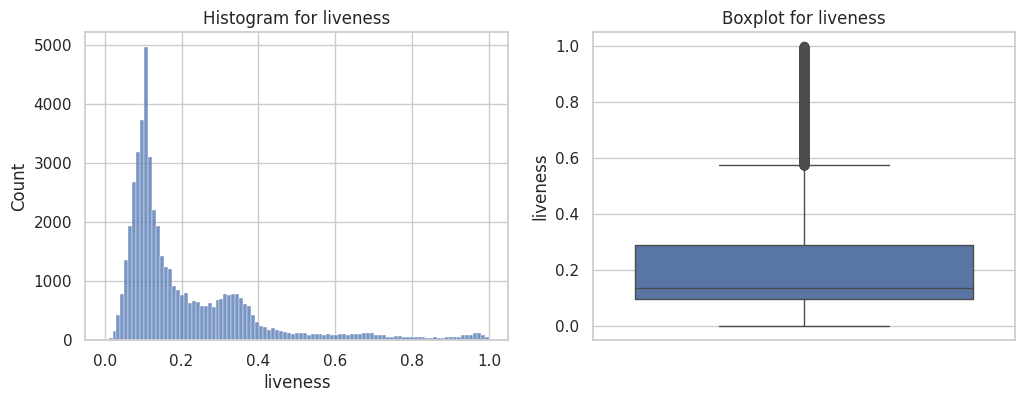

########################################################################################################################
Numerical Analysis for column: valence
Statistical Summary
count    50674.000000
mean         0.433113
std          0.258767
min          0.000000
25%          0.214000
50%          0.405000
75%          0.634000
max          0.993000
Name: valence, dtype: float64


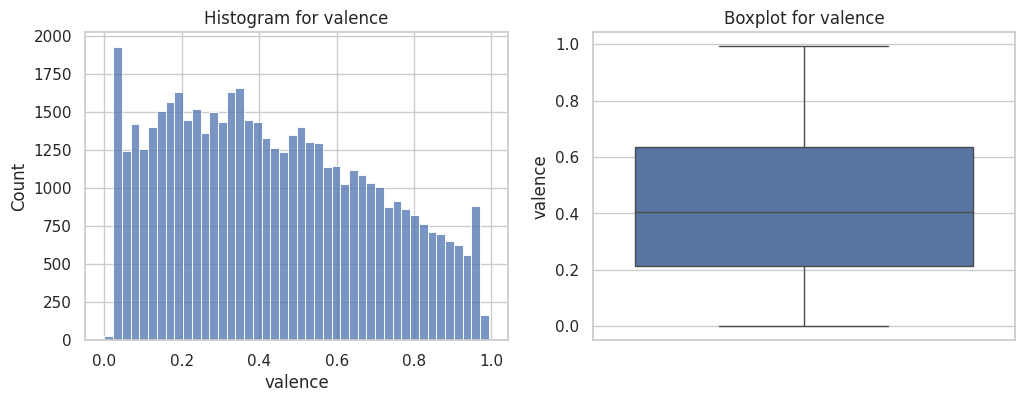

########################################################################################################################
Numerical Analysis for column: tempo
Statistical Summary
count    50674.000000
mean       123.508794
std         29.622349
min          0.000000
25%        100.682500
50%        121.989000
75%        141.642250
max        238.895000
Name: tempo, dtype: float64


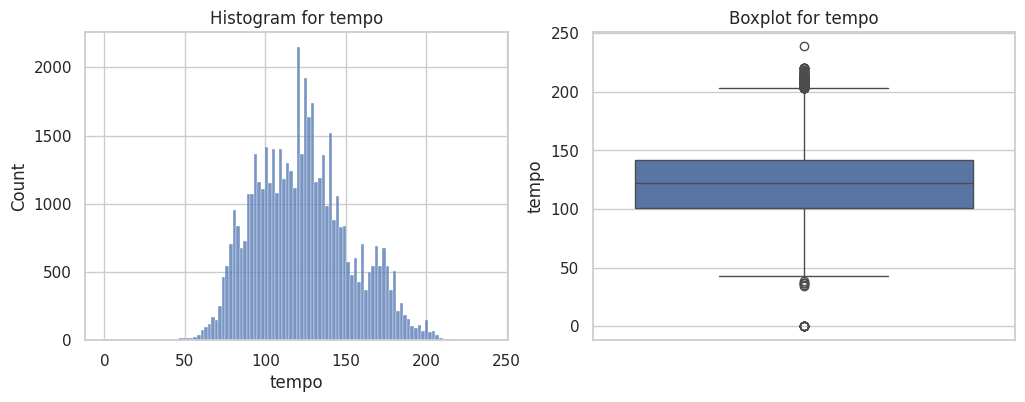

########################################################################################################################
Numerical Analysis for column: duration_min
Statistical Summary
count    50674.000000
mean         4.185893
std          1.793154
min          0.023983
25%          3.212217
50%          3.915550
75%          4.803046
max         63.606217
Name: duration_min, dtype: float64


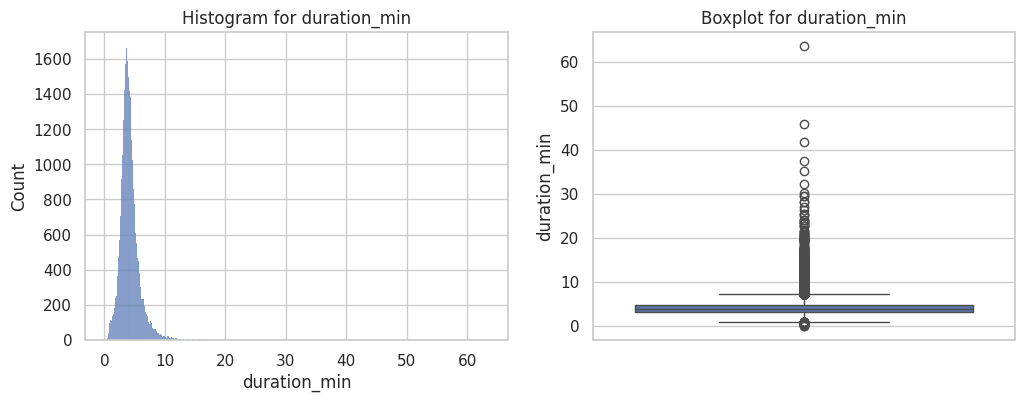

########################################################################################################################
************************************************************************************************************************
Pairplot


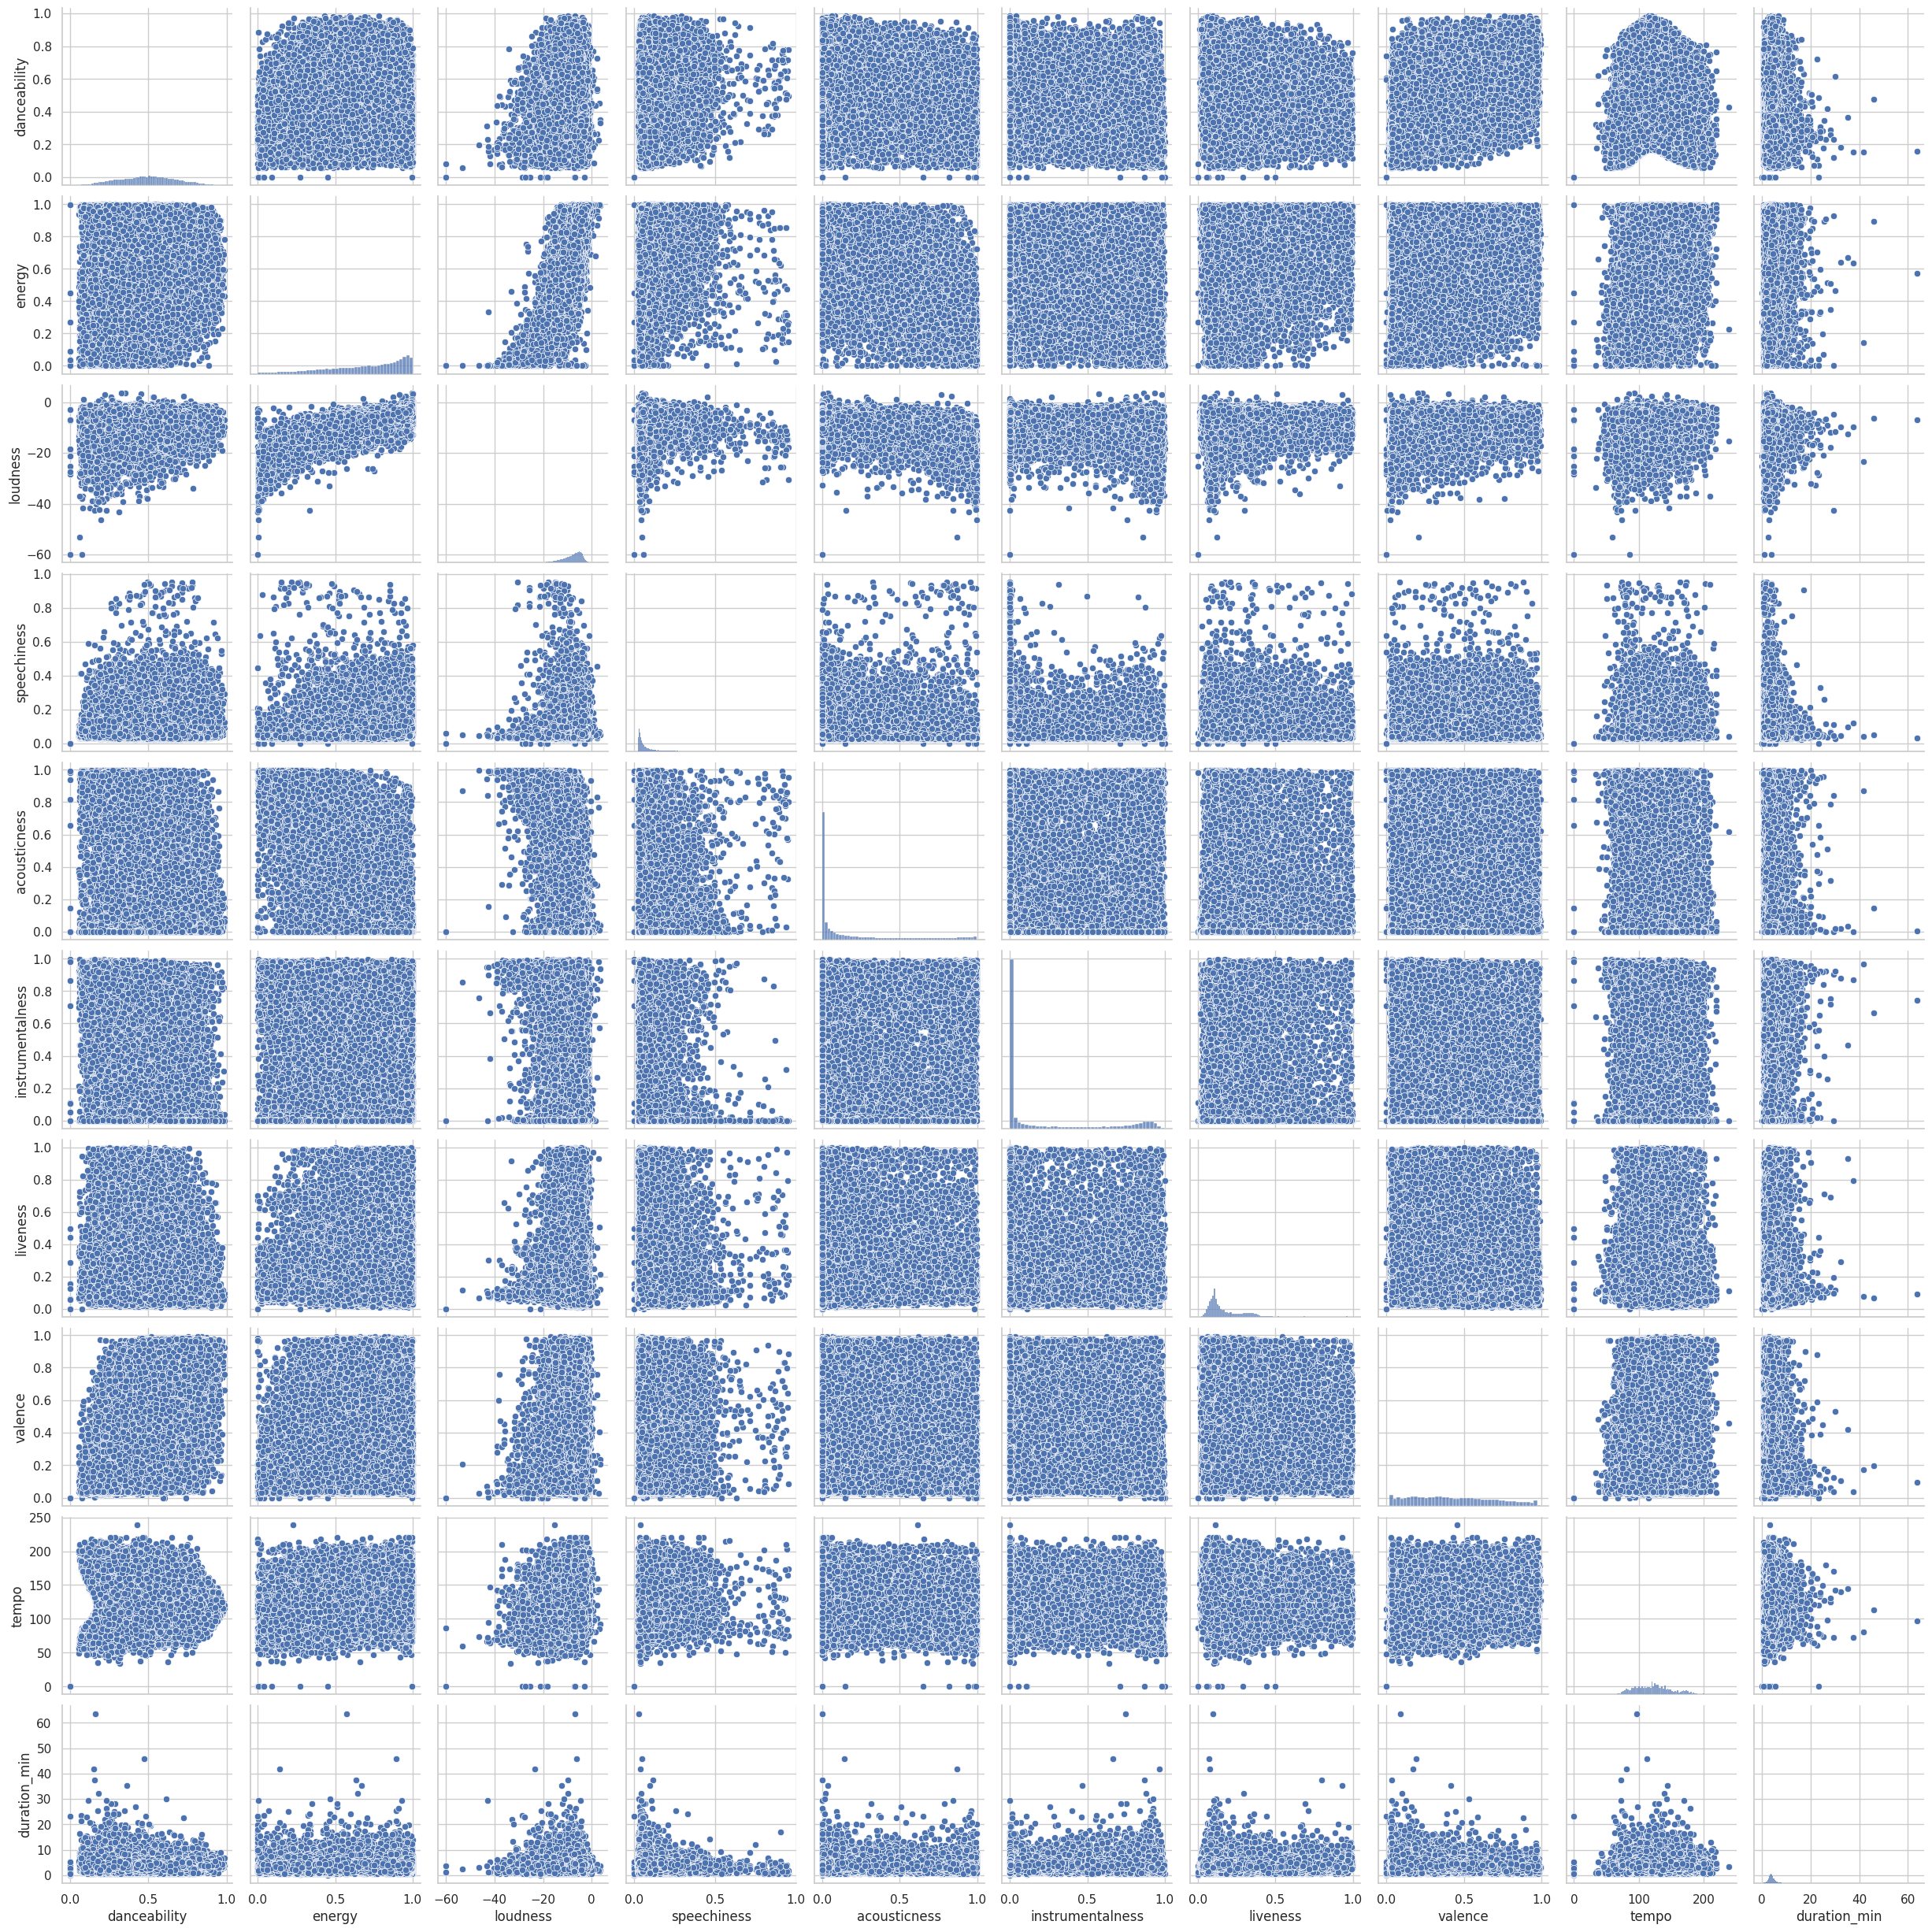

In [215]:
def float_analysis(df,columns):
    for column in columns:
        print(f"Numerical Analysis for column: {column}")
        print("Statistical Summary")
        print(df[column].describe())

        fig = plt.figure(figsize=(12,4))
        # hitogram for column
        plt.subplot(1,2,1)
        sns.histplot(df[column])
        plt.title(f"Histogram for {column}")
        # boxplot for column
        plt.subplot(1,2,2)
        sns.boxplot(df[column])
        plt.title(f"Boxplot for {column}")
        plt.show()

        print("#" * 120)
    print("*" * 120)
    print("Pairplot")
    sns.pairplot(df[columns])
    plt.show()

float_analysis(data_song, float_columns)